In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("homicide_by_countries.csv")
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [5]:
df.shape

(195, 6)

In [7]:
df.isnull().sum()

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [8]:
 df.dtypes

Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object

In [9]:
df["Rate"] = df["Rate"].astype(int)
df.dtypes

Location     object
Region       object
Subregion    object
Rate          int64
Count         int64
Year          int64
dtype: object

In [16]:
collumn_list = ["Rate", "Count", "Year"]
for i in collumn_list:
    df[i] = df[i].astype(int)

In [17]:
df.dtypes

Location     object
Region       object
Subregion    object
Rate          int64
Count         int64
Year          int64
dtype: object

In [18]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [19]:
df1 = df.sort_values('Count', ascending = False)
df1

,Location,Region,Subregion,Rate,Count,Year
26,Brazil,Americas,South America,22,47722,2020
125,Nigeria,Africa,Western Africa,22,44200,2019
78,India,Asia,Southern Asia,3,40651,2020
111,Mexico,Americas,Central America,28,36579,2020
186,United States,Americas,Northern America,6,21570,2020
...,...,...,...,...,...,...
73,Holy See,Europe,Southern Europe,0,0,2015
112,Monaco,Europe,Western Europe,0,0,2015
84,Isle of Man,Europe,Northern Europe,0,0,2016
151,San Marino,Europe,Southern Europe,0,0,2011


In [25]:
df1 = df[['Location', 'Count']].sort_values(by='Count', ascending = False).head(5)
df1

,Location,Count
26,Brazil,47722
125,Nigeria,44200
78,India,40651
111,Mexico,36579
186,United States,21570


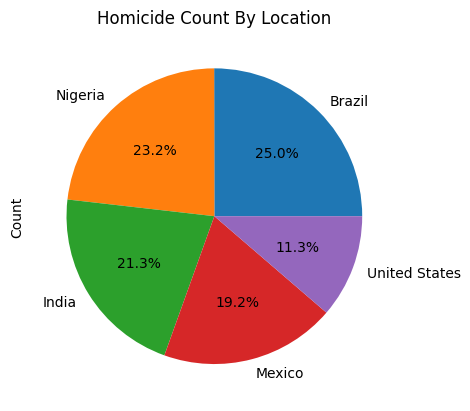

In [106]:
df1.plot(x="Location" , y="Count", kind="pie", labels=df1.Location, autopct = '%1.1f%%')
plt.legend().set_visible(False)
plt.title("Homicide Count By Location")
plt.show()

In [39]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [43]:
df2 = df.groupby("Region")["Count"].sum().sort_values(ascending = False)
df2

Region
Americas    153597
Asia        105552
Africa       99481
Europe       19869
Oceania        347
Name: Count, dtype: int64

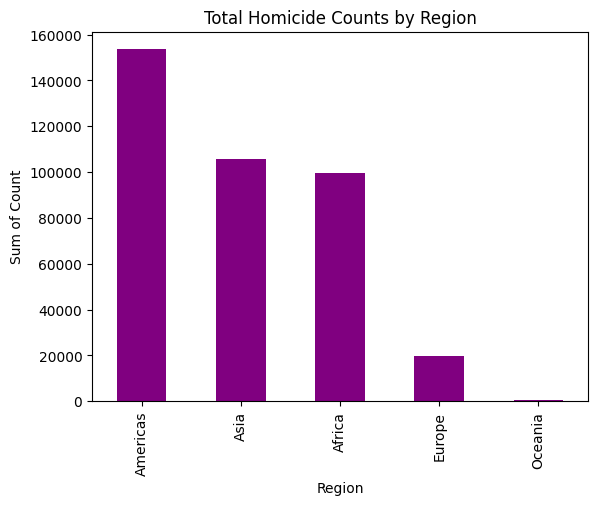

In [111]:
df2.plot(kind="bar", color="purple")
plt.title("Total Homicide Counts by Region")
plt.xlabel("Region")
plt.ylabel("Sum of Count")
plt.show()


In [51]:
df3 = df.groupby("Subregion")["Count"].sum().sort_values(ascending = False)
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int64

Text(0, 0.5, 'Sum of Count')

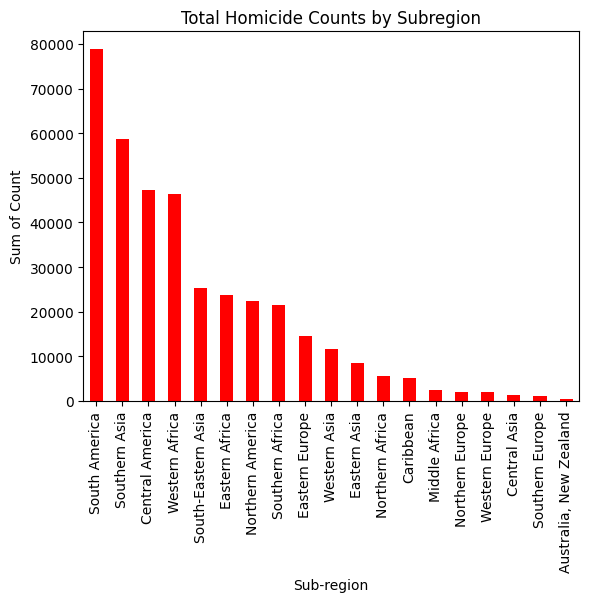

In [112]:
df3.plot(kind="bar", color="red")
plt.title("Total Homicide Counts by Subregion")
plt.xlabel("Sub-region")
plt.ylabel("Sum of Count")

In [62]:
df4 = df[(df["Region"] == 'Asia') | (df["Region"] == 'Europe')]
df4 = df4[df4["Year"] > 2016 ][["Region","Year","Count"]]

In [63]:
df4

,Region,Year,Count
0,Asia,2018,2474
1,Europe,2020,61
3,Europe,2020,2
8,Asia,2020,52
11,Europe,2020,65
...,...,...,...
178,Asia,2020,2095
182,Europe,2017,2751
183,Asia,2019,64
184,Europe,2018,755


In [68]:
df4 = df4.groupby(['Region', 'Year']).sum()['Count']
df4
                

Region  Year
Asia    2017     1787
        2018    16923
        2019     6458
        2020    53516
        2021    15299
Europe  2017     3670
        2018      883
        2019      249
        2020    15066
Name: Count, dtype: int64

In [79]:

df_unstacked = df4.unstack(level = 0)
df_unstacked

Region,Asia,Europe
Year,,
2017,1787.0,3670.0
2018,16923.0,883.0
2019,6458.0,249.0
2020,53516.0,15066.0
2021,15299.0,NaN


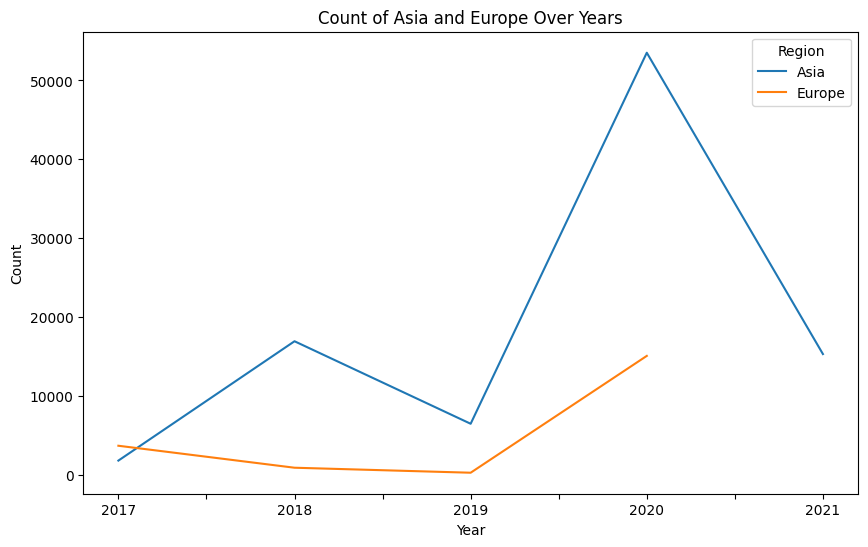

In [83]:
df_unstacked.index = df_unstacked.index.astype(int).astype(str)
df_unstacked.plot(kind = "line", figsize= (10,6))
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Count of Asia and Europe Over Years")
plt.show()


In [77]:
df_unstacked.dtypes

Region
Asia      float64
Europe    float64
dtype: object

In [84]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [85]:
df5 = df.groupby("Year")["Rate"].sum().sort_values(ascending = False)
df5

Year
2020    564
2019    153
2012    113
2016     76
2018     64
2015     55
2014     52
2009     36
2021     28
2017     27
2013     20
2007     19
2010     18
2006     12
2011      8
2008      5
Name: Rate, dtype: int64

Text(0.5, 1.0, 'Sum Of Rate By Region and Year')

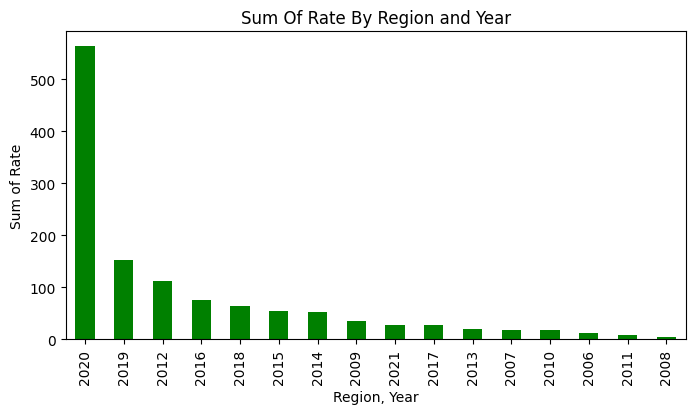

In [87]:
df5.plot(kind="bar", figsize=(8,4), color = "green")
plt.xlabel("Region, Year")
plt.ylabel("Sum of Rate")
plt.title("Sum Of Rate By Region and Year")

In [88]:
df6 = df[["Year","Region","Count"]]
df6

,Year,Region,Count
0,2018,Asia,2474
1,2020,Europe,61
2,2020,Africa,580
3,2020,Europe,2
4,2012,Africa,1217
...,...,...,...
190,2018,Americas,10598
191,2011,Asia,1358
192,2013,Asia,1703
193,2015,Africa,853


In [93]:
df6 = df6.groupby(["Year","Region"]).sum().sort_values(by = "Year", ascending = False).head(40)
df6



Count
Year Region          
2021 Asia       15299
2020 Oceania      221
     Americas  134784
     Europe     15066
     Asia       53516
     Africa     28460
2019 Americas    4276
     Asia        6458
     Africa     44210
     Oceania      126
     Europe       249
2018 Asia       16923
     Americas   13793
     Europe       883
2017 Africa      1467
     Europe      3670
     Asia        1787
2016 Americas     608
     Asia         627
     Africa      4987
     Europe         0
2015 Africa      2206
     Asia         241
     Europe         0
2014 Americas      13
     Asia        3029
2013 Asia        5782
2012 Americas      53
     Africa     15264
     Asia          61
2011 Asia        1626
     Africa       855
     Europe         0
2010 Africa       303
     Europe         1
2009 Africa        27
     Americas      42
2008 Africa      1702
2007 Americas      26
2006 Asia         203

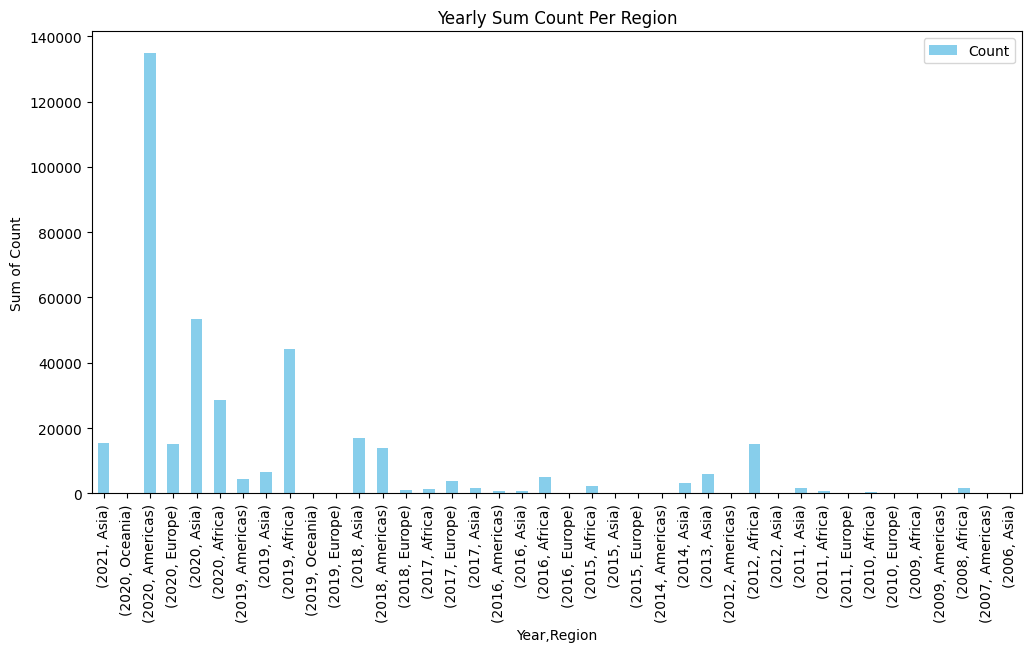

In [113]:
df6.plot(kind= "bar", figsize= (12,6), color="skyblue")
plt.title("Yearly Sum Count Per Region")
plt.ylabel("Sum of Count")
plt.show()